### Imports & Preparation

In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Checkpoint Loading

In [2]:
checkpoint = torch.load('../../models2D/detector2D_model_e30.t7')

epoch = checkpoint['epoch']

train_time = checkpoint['train_time']
test_time = checkpoint['test_time']

train_epoch_loss = checkpoint['train_epoch_loss']
train_epoch_acc = checkpoint['train_epoch_acc']
train_epoch_C0_acc = checkpoint['train_epoch_C0_acc']
train_epoch_C1_acc = checkpoint['train_epoch_C1_acc']

train_batch_loss = checkpoint['train_batch_loss']
train_batch_acc = checkpoint['train_batch_acc']
train_batch_C0_acc = checkpoint['train_batch_C0_acc']
train_batch_C1_acc = checkpoint['train_batch_C1_acc']

test_loss = checkpoint['test_loss']
test_acc = checkpoint['test_acc']
test_C0_acc = checkpoint['test_C0_acc']
test_C1_acc = checkpoint['test_C1_acc']

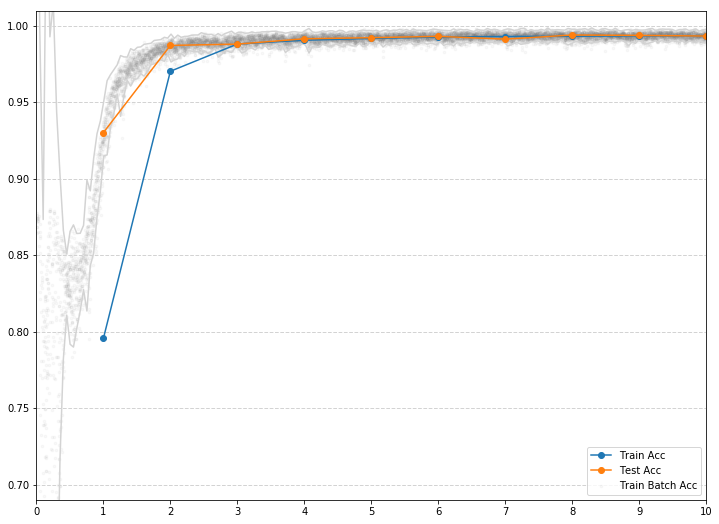

In [3]:
N = len(train_epoch_acc[:10])

train_batch_acc_np = np.array(train_batch_acc[:10]).reshape(-1)
train_batch_acc_np_cum = train_batch_acc_np.reshape(-1, 50)

train_batch_mean = np.mean(train_batch_acc_np_cum, axis = 1)
train_batch_std = np.std(train_batch_acc_np_cum, axis = 1)

plt.figure(figsize=(12,9))
plt.ylim(0.69, 1.01)
plt.xlim(0,N)

plt.scatter(np.linspace(0,N,train_batch_acc_np.shape[0]), train_batch_acc_np, label='Train Batch Acc', color = (0.5,0.5,0.5,0.05), s=7)
plt.plot(np.linspace(0,N,train_batch_mean.shape[0]), train_batch_mean + 2*train_batch_std, color='lightgrey')
plt.plot(np.linspace(0,N,train_batch_mean.shape[0]), train_batch_mean - 2*train_batch_std, color='lightgrey')

plt.plot(1 + np.arange(0,N), train_epoch_acc[:10], label='Train Acc', marker='o')
plt.plot(1 + np.arange(0,N), test_acc[:10], label='Test Acc', marker='o')

plt.yticks(0.05 * np.arange(14,21))
plt.hlines(0.05 * np.arange(14,21), 0, N, color='lightgrey', linewidths=1, linestyles='dashed')
plt.xticks(np.arange(0,N+1).astype(int))
plt.legend(loc = 'lower right')

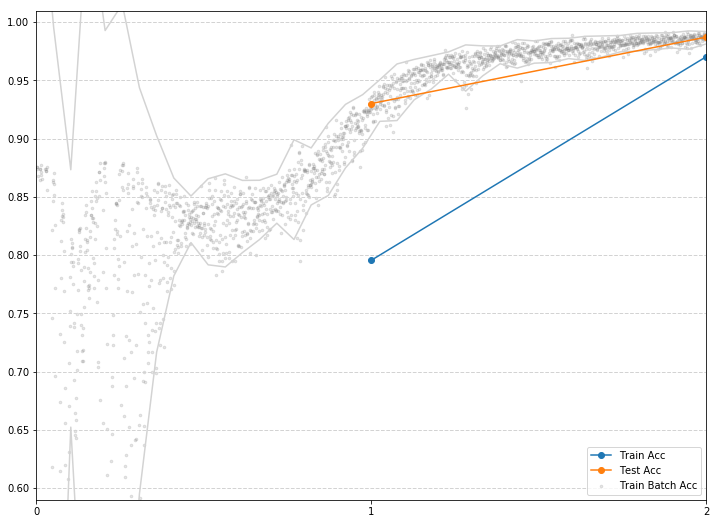

In [4]:
N = len(train_epoch_acc[:2])

train_batch_acc_np = np.array(train_batch_acc)[:2].reshape(-1)
train_batch_acc_np_cum = train_batch_acc_np.reshape(-1, 50)

train_batch_mean = np.mean(train_batch_acc_np_cum, axis = 1)
train_batch_std = np.std(train_batch_acc_np_cum, axis = 1)

plt.figure(figsize=(12,9))
plt.ylim(0.59, 1.01)
plt.xlim(0, N)

plt.scatter(np.linspace(0,N,train_batch_acc_np.shape[0]), train_batch_acc_np, label='Train Batch Acc', color = (0.5,0.5,0.5,0.2), s=7)
plt.plot(np.linspace(0,N,train_batch_mean.shape[0]), train_batch_mean + 2*train_batch_std, color='lightgrey')
plt.plot(np.linspace(0,N,train_batch_mean.shape[0]), train_batch_mean - 2*train_batch_std, color='lightgrey')

plt.plot(1 + np.arange(0,N), train_epoch_acc[:2], label='Train Acc', marker='o')
plt.plot(1 + np.arange(0,N), test_acc[:2], label='Test Acc', marker='o')

plt.yticks(0.05 * np.arange(12,21))
plt.hlines(0.05 * np.arange(12,21), 0, N, color='lightgrey', linewidths=1, linestyles='dashed')
plt.xticks(np.arange(0,N+1).astype(int))
plt.legend(loc = 'lower right')

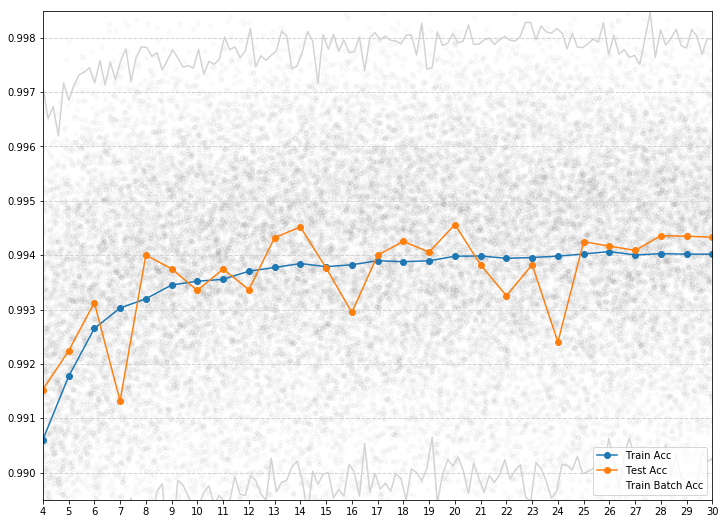

In [5]:
start = 4
end = 30

N = end - start + 1

train_batch_acc_np = np.array(train_batch_acc)[start:end+1].reshape(-1)
train_batch_acc_np_cum = train_batch_acc_np.reshape(-1, 200)

train_batch_mean = np.mean(train_batch_acc_np_cum, axis = 1)
train_batch_std = np.std(train_batch_acc_np_cum, axis = 1)

plt.figure(figsize=(12,9))
plt.ylim(0.9895, 0.9985)
plt.xlim(start, end)

plt.scatter(start+np.linspace(0,N-1,train_batch_acc_np.shape[0]), train_batch_acc_np, label='Train Batch Acc', color = (0.0,0.0,0.0,0.02), s=20)
plt.plot(start+np.linspace(0,N-1,train_batch_mean.shape[0]), train_batch_mean + 2*train_batch_std, color='lightgrey')
plt.plot(start+np.linspace(0,N-1,train_batch_mean.shape[0]), train_batch_mean - 2*train_batch_std, color='lightgrey')

plt.plot(start+np.arange(0,N), train_epoch_acc[start-1:end], label='Train Acc', marker='o')
plt.plot(start+np.arange(0,N), test_acc[start-1:end], label='Test Acc', marker='o')

plt.hlines(0.99 + 0.001 * np.arange(9), start, end, color='lightgrey', linewidths=1, linestyles='dashed')

plt.xticks(np.arange(start,end+1).astype(int))
plt.yticks(0.99 + 0.001 * np.arange(9))

plt.legend(loc = 'lower right')

(30,)


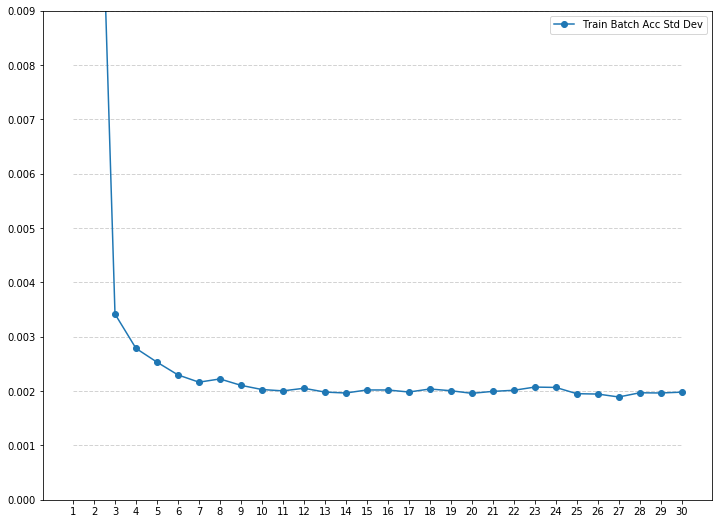

In [6]:
N = len(train_epoch_acc)

train_batch_acc_np = np.std(np.array(train_batch_acc), axis = 1)

print (train_batch_acc_np.shape)

plt.figure(figsize=(12,9))
plt.ylim(0.0, 0.001)
plt.plot(1 + np.arange(0,N), train_batch_acc_np, label='Train Batch Acc Std Dev', marker='o')

plt.yticks(0.001 * np.arange(0,10))
plt.hlines(0.001 * np.arange(0,10), 1, N, color='lightgrey', linewidths=1, linestyles='dashed')
plt.xticks(np.arange(1,N+1).astype(int))
plt.legend(loc = 'upper right')